In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pymc as pm
import numpy as np
import matplotlib.pyplot as plt
import dive 
import deerlab as dl
from scipy.io import loadmat
import arviz as az

WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


## Load and plot data and reference distribution

In [3]:
Pid = 3992
loaded_data = np.genfromtxt(f"../../data/{Pid}_good.dat", skip_header=1, delimiter=',')
t = loaded_data[:,0]
Vexp = loaded_data[:,1]

P0s = loadmat('..\..\data\edwards_testset\distributions_2LZM.mat')['P0']
rref = np.squeeze(loadmat('..\..\data\edwards_testset\distributions_2LZM.mat')['r0'])
Pref = P0s[Pid-1,:]

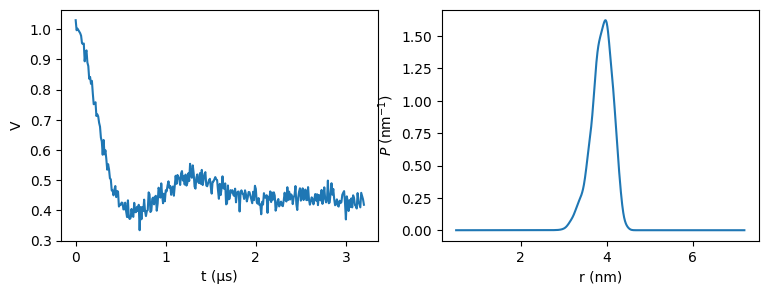

In [4]:
plt.figure(figsize=(9,3))
plt.subplot(1,2,1)
plt.plot(t, Vexp)
plt.xlabel('t (µs)')
plt.ylabel('V')

plt.subplot(1,2,2)
plt.plot(rref, Pref)
plt.xlabel('r (nm)')
plt.ylabel(r'$P$ (nm$^{-1}$)')
plt.show()

7.017642571710878

## Bayes Tikhonov

In [40]:
pars = {"method": 'regularization', "r": np.linspace(1.5,7,56), "rmax_opt": "user"}
model_tikh = dive.model(t, Vexp, pars)

Time range:         0 µs to 3.2 µs  (321 points, step size 0.01 µs)
Distance range:     1.5 nm to 7 nm  (56 points, step size 0.1 nm)
Vexp max:           1.0298
Background:         exponential
P model:            regularization


In [41]:
MCMCparameters = {"draws": 500,"tune": 100, "chains": 2, "cores": 2}
trace = dive.sample(model_tikh, MCMCparameters)

Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>NUTS: [V0, lamb, Bend]
>randPnorm_posterior: [P]
>randTau_posterior: [tau]
>randDelta_posterior: [delta]


ParallelSamplingError: Chain 0 failed with: The model could not be unpickled. This is required for sampling with more than one core and multiprocessing context spawn or forkserver.

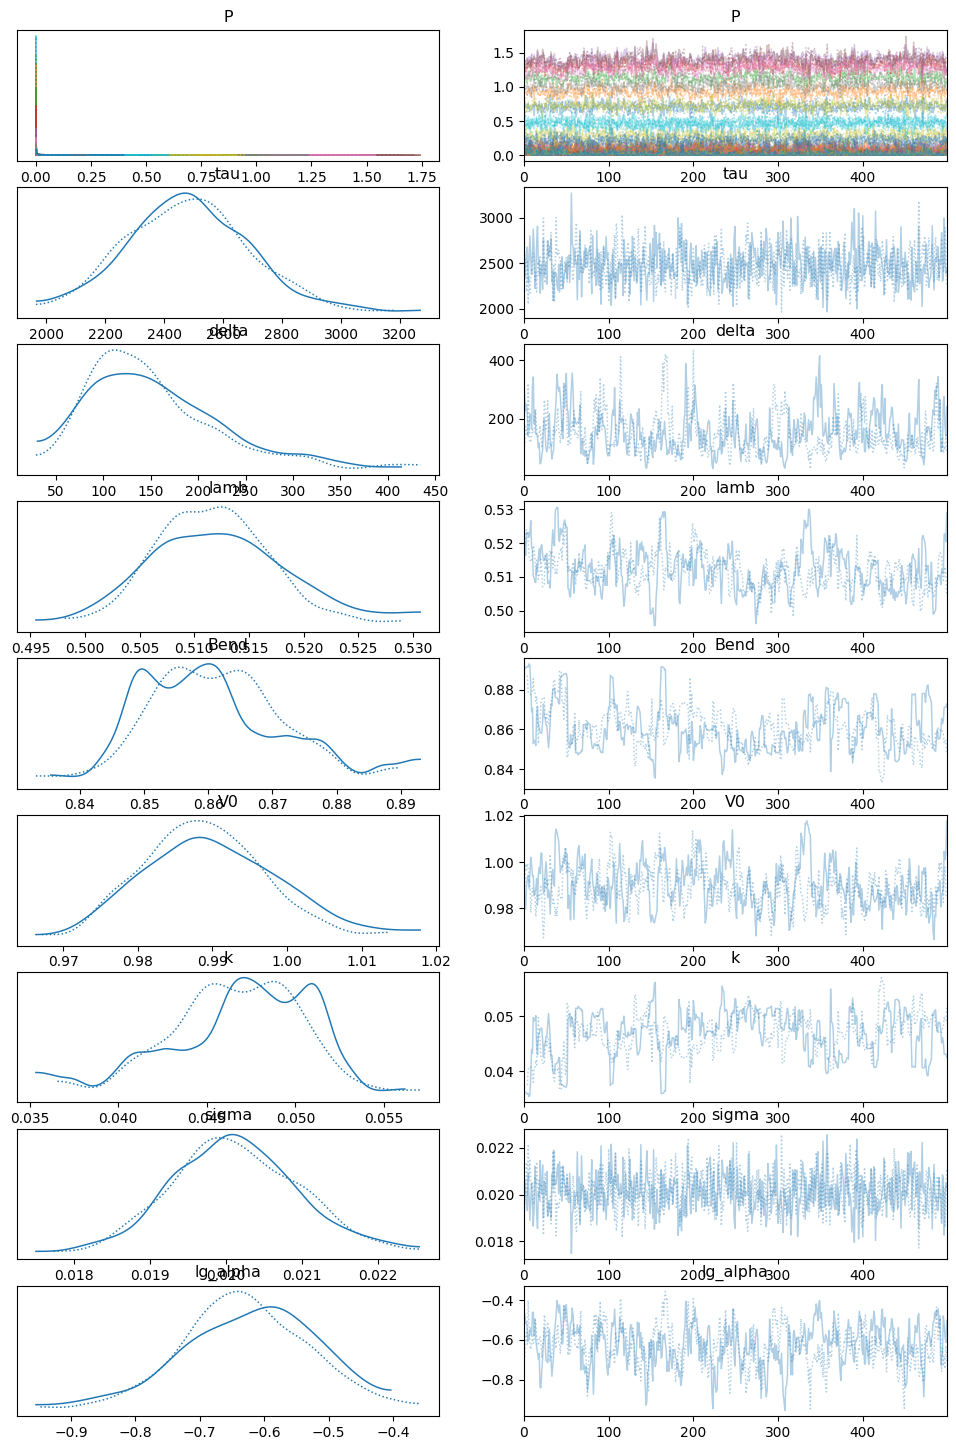

In [42]:
az.plot_trace(trace, combined=False);

In [43]:
az.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
P[0],0.080,0.097,0.000,0.272,0.005,0.004,491.0,419.0,1.01
P[1],0.066,0.062,0.000,0.179,0.004,0.003,247.0,543.0,1.03
P[2],0.062,0.054,0.000,0.159,0.003,0.002,379.0,733.0,1.01
P[3],0.062,0.057,0.000,0.161,0.003,0.002,467.0,733.0,1.01
P[4],0.059,0.054,0.000,0.153,0.002,0.002,614.0,705.0,1.01
P[5],0.051,0.049,0.000,0.139,0.002,0.001,686.0,807.0,1.00
P[6],0.042,0.042,0.000,0.119,0.002,0.001,803.0,919.0,1.00
P[7],0.031,0.038,0.000,0.104,0.001,0.001,1037.0,980.0,1.00
P[8],0.032,0.038,0.000,0.106,0.001,0.001,965.0,714.0,1.00
P[9],0.033,0.039,0.000,0.103,0.001,0.001,989.0,884.0,1.00


## Bayes Single Gaussian

In [32]:
pars_gauss = {"method": 'gaussian', "r": np.linspace(2,6,50), "nGauss": 1}
model_gauss = dive.model(t, Vexp, pars_gauss)

Time range:         0 µs to 3.2 µs  (321 points, step size 0.01 µs)
Distance range:     2 nm to 6 nm  (50 points, step size 0.0816327 nm)
Vexp max:           1.0298
Background:         exponential
P model:            1 Gaussians


In [33]:
m = model_gauss['model']
m

r0_rel ~ Beta(2, 2)
     w ~ Unknown(1, 11, 0.1, 0.2, 0.05, 3)
  lamb ~ Beta(1.3, 2)
  Bend ~ Beta(1, 1.5)
    V0 ~ TruncatedNormal(1, 0.2, 0, inf)
 sigma ~ Gamma(0.7, f())
    r0 ~ Deterministic(f(r0_rel))
     P ~ Deterministic(f(w, r0_rel))
     k ~ Deterministic(f(Bend))
     V ~ N(f(V0, lamb, w, Bend, r0_rel), sigma)

In [34]:
m.rvs_to_initial_values

{r0_rel ~ Beta(2, 2): array([0.5]),
 w ~ Unknown(1, 11, 0.1, 0.2, 0.05, 3): array([0.5]),
 lamb ~ Beta(1.3, 2): array(0.2),
 Bend ~ Beta(1, 1.5): array(0.8),
 V0 ~ TruncatedNormal(1, 0.2, 0, inf): array(0.99),
 sigma ~ Gamma(0.7, f()): array(0.1)}

In [35]:
MCMCparameters = {"draws": 200, "tune": 100, "chains": 1, "cores": 1}
trace_gauss = dive.sample(model_gauss, MCMCparameters)

Only 200 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [r0_rel, w, lamb, Bend, V0, sigma]


error: (len(y)-offy>(n-1)*abs(incy)) failed for 1st keyword n: daxpy:n=55

In [ ]:
dive.summary(trace_gauss, model_gauss)  

## DeerLab

In [ ]:
r_dl = np.linspace(2,6,200)

fit = dl.fitmodel(Vexp,t,r_dl,'P',dl.bg_exp,dl.ex_4pdeer,verbose=True)
fit.plot();

print(f'lg(α) = {round(np.log10(fit.regparam),2)}')